# Сессия 1

------

В данной сессии необходимо изучить предоставленные данные, провести их предобработку, а также визуализировать обработанные данные для дальнейшего анализа


С помощью библиотеки `pandas` мы загрузим наш файл с данными

In [1]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/Drug_Classifier/"

df = pd.read_csv(path+"drug200.csv")

## 1.1 Изучение предоставленных данных

In [2]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Итог изучения данных

Данные полны:
- Нет нулевых значений
- Есть все необходимиые данные
- Нет необходимости в глубокой предобработке, достаточно просто привести данные к подходящему формату

## 1.2 Предобработка

Так как с данными не нужно делать какие-либо дополнительные действие, достаточно привести ключевые поля `Sex`, `BP`, `Cholesterol` и `Drug` к числовому формату

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["BP"] = le.fit_transform(df["BP"])
df["Cholesterol"] = le.fit_transform(df["Cholesterol"])
df["Drug"] = le.fit_transform(df["Drug"])


df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


### Итог предобработки

Все данные приведены к числовому формату, без потерь или появления ошибок и аномалий в данных

## 1.3 Визуализация

Так как данные подготовлены к дальнейшему использованию, нам потребуется визуализировать данные для дальнейшего определения эффективной модели обучения

### Тепловая карта

Данная визуализация помогает найти взаимосвязь объекта и цели обработки данных

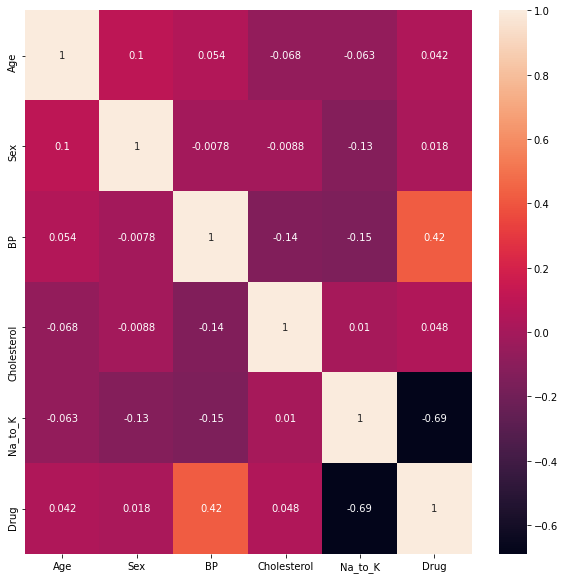

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 10))

sns.heatmap(df.corr(), annot = True)

### Ящик с усами

Данный график покажет разброс данных по каждому из параметров

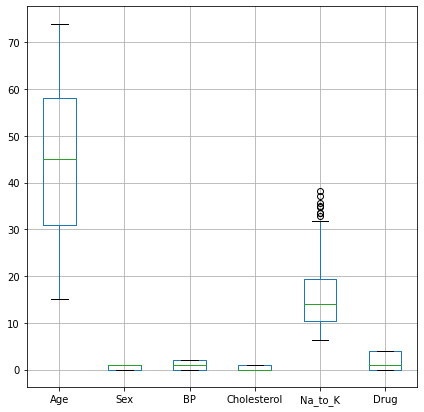

In [7]:
import warnings
warnings.filterwarnings("ignore")

df.boxplot(figsize=(7,7))

### Гистограмма

Как видно из графика выше, столбец `Age` имеет наибольший разброс, поэтому имеет смысл изучить разброс возраста в выборке на конкретных числах

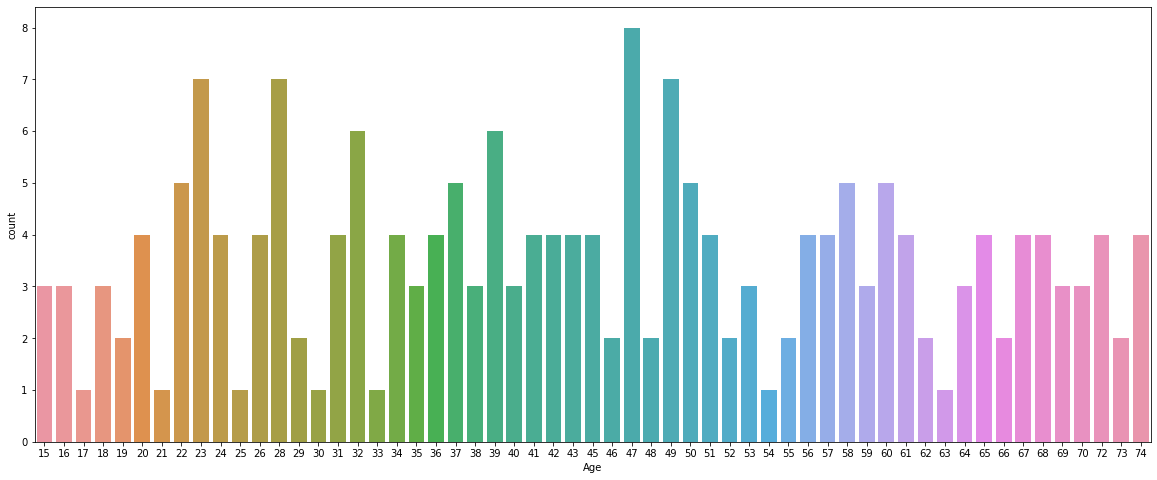

In [8]:
plt.figure(figsize = (20, 8))
sns.countplot(df["Age"])

## Итоги Сессии

- Были изучены имеющиеся данные
- Провели предобработку данных, привели все данные к числовым типам
- Визуализировали имеющиеся данные 

# Сессия 2

------

В данной сессии необходимо построить и обучить модель классификации на основе данных, которые мы подготовили в прошлом модуле, а также найти наиболее эффективную модель

### 1.1 Разбиение данных на тренировочную и тестовые выборки

Задачей классификации будет являться определение типа `Drug` на основе входных данных

Так как у нас всего 200 записей, вместо стандартного разбиение 70:30 мы будем использовать 90:10

In [9]:
from sklearn.model_selection import train_test_split
df_x = df.drop(["Drug"], axis=1)
df_y = df["Drug"].values

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, shuffle=True)

## 1.2 Выбор и обучение моделей

#### Выбор моделей для обучения

Так как перед нами стоит задача классификации, то я выбрал следующие модели обучения:

- `Linear SVC` т.к. она хорошо подходит для обучения на малых объемах данных
- `KNeighbors` т.к. наши данные только числовые
- `XGBoosting` т.к. мы сможем просмотреть взаимосвязь параметров и их важность

Для достоверности результата, обучение будет проведено с несколькими параметрами

In [10]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report

##### Linear SVC


In [11]:
c = [1.0, 2.0, 4.0]
train_score_svc = list()
test_score_svc = list()
for i in c:
  svc = LinearSVC(C=i)
  svc.fit(x_train, y_train)
  train_score_svc.append(svc.score(x_train, y_train))
  test_score_svc.append(svc.score(x_test, y_test))
  print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.71      0.67      0.68        20
weighted avg       0.87      0.90      0.87        20

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         1
           4       1.00      0.60      0.75         5

    accuracy                           0.85        20
   macro avg       0.65      0.65      0.63        20
weighted avg       0.83      0.85      0.82        20

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.

In [12]:
print(train_score_svc)
print(test_score_svc)

[0.8444444444444444, 0.7555555555555555, 0.7444444444444445]
[0.9, 0.85, 0.9]


- Результат алгоритма - 90.00%

##### KNeighbors

In [13]:
neighbors = [3, 6, 9]
train_score_knb = list()
test_score_knb = list()
for n in neighbors:
  knb = KNeighborsClassifier(n_neighbors=n)
  knb.fit(x_train, y_train)
  train_score_knb.append(knb.score(x_train, y_train))
  test_score_knb.append(knb.score(x_test, y_test))
  print(classification_report(y_test, knb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           4       0.67      0.40      0.50         5

    accuracy                           0.75        20
   macro avg       0.61      0.52      0.55        20
weighted avg       0.75      0.75      0.73        20

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           4       0.67      0.40      0.50         5

    accuracy                           0.75        20
   macro avg       0.63      0.52      0.55        20
weighted avg       0.78      0.75      0.75        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.

In [14]:
print(train_score_knb)
print(test_score_knb)

[0.8444444444444444, 0.8277777777777777, 0.7333333333333333]
[0.75, 0.75, 0.7]


- Результат алгоритма - 75.00%

##### XGBoosting

In [15]:
estims = [50, 100, 200]
train_score_xgb = list()
test_score_xgb = list()
for est in estims:
  xgb = XGBClassifier(n_estimators=est, verbosity=1)
  xgb.fit(x_train, y_train)
  train_score_xgb.append(xgb.score(x_train, y_train))
  test_score_xgb.append(xgb.score(x_test, y_test))
  print(classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


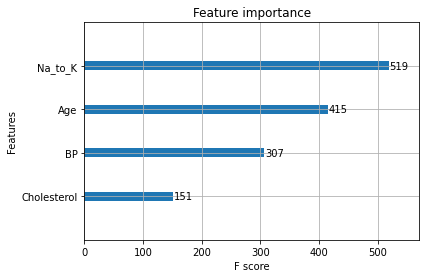

In [16]:
print(train_score_xgb)
print(test_score_xgb)
plot_importance(xgb)

- Результат алгоритма - 100.00%

Важнейшая метрика - `Na_to_K`

### Итоги обучения моделей

- Linear SVC Clssifier = 90.00%
- KNeighbors Classifier = 75.00%
- XGBoosting Classifier = 100.00%

Лучшими моделями обучения классификации оказались `XGBoost`

Наиболее важной метрикой для определения `Drug` стала `Na_to_K`, следующая по важности - `Age`

## Итоги Сессии

------

В рамках данной сессии мы 
- определили ключевые параметры для поиска целевой переменной
- разбили данные на тренировочные и тестовые 
- выбрали модели для обучения и равнили их итоги
- нашли важнейшие метрики для определения целевой переменной

Так же мы смогли добиться результата в 100% определения

# Заключение
------

В рамках данной работы мы изучили и предобработали исходные данные, визуализировали их содержимое, выбрали модели обучения и обучили их на основе имеющихся данных


Все задачи были выполнены, цель можно считать достигнутой
